<a href="https://colab.research.google.com/github/Kdavis2025/Automating-Compliance-AI-and-Machine-Learning-Approaches-to-Achieviing-CMMC-2.0-Certification/blob/main/Subcontractor_Readiness_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In Colab, run this cell first to install any missing packages.
!pip install pandas scikit-learn matplotlib ipywidgets

import pandas as pd
import numpy as np

# For simple classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Import accuracy_score along with other metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For plotting
import matplotlib.pyplot as plt

# For interactive widgets (questionnaire)
from ipywidgets import widgets, VBox, HBox, Output
from IPython.display import display, clear_output

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.9 MB/s eta 0:00:00


In [ ]:
# ┌────────────────────────────────────────────────────────────────────────┐
# │                 2a. QUESTION BANK + IMPROVEMENT ADVICE                │
# └────────────────────────────────────────────────────────────────────────┘

# Structure:
#   QUESTION_FLOW = {
#       'L1': { 'AC.L1-b.1.i': { 'question': str, 'advice': str }, ... },
#       'L2': { 'AC.L2-3.1.1': {...}, ... },
#       'L3': { 'CM.L3-3.4.2e': {...}, ... }
#   }

QUESTION_FLOW = {
    'L1': {
        'AC.L1-b.1.i': {
            'question': "Do you have documented access control policies that restrict access to FCI? (yes/no)",
            'advice': "Implement or update your access control policy; ensure only authorized users access FCI."
        },
        'SI.L1-b.1.xii': {
            'question': "Do you regularly apply patches and perform flaw remediation on systems processing FCI? (yes/no)",
            'advice': "Establish a patch management schedule; use automated tools to identify missing patches."
        },
        'IA.L1-b.1.v': {
            'question': "Do you enforce unique user IDs and basic authentication for all users handling FCI? (yes/no)",
            'advice': "Require unique IDs; implement password complexity and change frequency."
        },
        # … (add the remaining 12 L1 controls with similar structure) …
        'MP.L1-b.1.vii': {
            'question': "Do you have procedures for media disposal (e.g., secure destruction) of FCI? (yes/no)",
            'advice': "Create and enforce a media disposal policy; use approved destruction methods."
        },
        'PE.L1-b.1.viii': {
            'question': "Do you limit physical access to systems processing FCI? (yes/no)",
            'advice': "Implement badge/ID controls; keep audit logs of physical entry."
        },
        'SC.L1-b.1.x': {
            'question': "Do you have network boundary protections (e.g., firewalls) for FCI systems? (yes/no)",
            'advice': "Deploy properly configured firewalls and monitor traffic to/from FCI segments."
        },
        'SC.L1-b.1.xi': {
            'question': "Do you separate public‐access systems from FCI systems? (yes/no)",
            'advice': "Place public‐facing servers in a DMZ; strictly isolate from FCI‐handling networks."
        },
        'SI.L1-b.1.xiii': {
            'question': "Do you have anti‐malware protection on all endpoints processing FCI? (yes/no)",
            'advice': "Install and update anti‐malware software; schedule regular scans."
        },
        'SI.L1-b.1.xiv': {
            'question': "Do you update anti‐malware signatures at least weekly? (yes/no)",
            'advice': "Enable automatic updates for signature files; verify update logs weekly."
        },
        'SI.L1-b.1.xv': {
            'question': "Do you scan your systems/files for malicious code regularly? (yes/no)",
            'advice': "Schedule periodic full‐disk and file‐based scans; review logs for detected malware."
        }
    },
    'L2': {
        'AC.L2-3.1.1': {
            'question': "Do you enforce multi‐factor authentication (MFA) to access CUI? (yes/no)",
            'advice': "Implement MFA for all remote and privileged CUI access (e.g., token + password)."
        },
        'CM.L2-3.4.2': {
            'question': "Do you use automated tools to detect unauthorized configuration changes? (yes/no)",
            'advice': "Deploy a configuration monitoring solution (e.g., CIS‐CAT, Chef InSpec)."
        },
        'RA.L2-3.11.2': {
            'question': "Do you perform vulnerability scans against CUI environment at least weekly? (yes/no)",
            'advice': "Schedule weekly vulnerability scans; remediate findings per risk ranking."
        },
        'IR.L2-3.6.1': {
            'question': "Do you have a documented incident handling process for CUI breaches? (yes/no)",
            'advice': "Develop and test an incident response plan; assign roles and timelines."
        },
        # … (add ~16 more L2 controls similarly) …
        'AU.L2-3.3.1': {
            'question': "Do you collect and review audit logs for CUI‐handling systems? (yes/no)",
            'advice': "Enable syslog/Windows Event forwarding; review logs weekly for anomalies."
        },
        'MA.L2-3.7.1': {
            'question': "Do you perform periodic maintenance on CUI systems following secure procedures? (yes/no)",
            'advice': "Use documented procedures; ensure maintenance personnel are authorized."
        },
        'SC.L2-3.13.8': {
            'question': "Is CUI encrypted in transit (e.g., TLS 1.2+)? (yes/no)",
            'advice': "Enforce TLS 1.2 or higher; disable insecure protocols."
        },
        'SC.L2-3.13.11': {
            'question': "Is CUI encrypted at rest on all devices/media? (yes/no)",
            'advice': "Use FIPS‐validated encryption (e.g., BitLocker, LUKS) for disks and removable media."
        }
    },
    'L3': {
        'CM.L3-3.4.2e': {
            'question': "Do you have automated, real‐time detection & remediation of configuration drift? (yes/no)",
            'advice': "Implement a continuous compliance tool (e.g., OpenSCAP, Puppet/Ansible compliance)."
        },
        'RA.L3-3.11.1e': {
            'question': "Do you conduct threat‐informed risk assessments using up‐to‐date adversary TTPs? (yes/no)",
            'advice': "Leverage MITRE ATT&CK data; integrate threat intel into your risk management process."
        },
        'SI.L3-3.14.6e': {
            'question': "Do you have an active Threat‐Guided Intrusion Detection System (IDS) monitoring CUI networks? (yes/no)",
            'advice': "Deploy an anomaly‐based IDS (e.g., Suricata, Zeek) tuned to your environment."
        },
        'IR.L3-3.6.2e': {
            'question': "Do you maintain a dedicated Cyber Incident Response Team (CIRT) that exercises SIRTs regularly? (yes/no)",
            'advice': "Form a CIRT; schedule bi‐annual tabletop exercises; update playbooks based on lessons learned."
        }
        # … (add more L3 controls if needed) …
    }
}


In [ ]:
# ┌────────────────────────────────────────────────────────────────────────┐
# │                 2a. QUESTION BANK + IMPROVEMENT ADVICE                │
# └────────────────────────────────────────────────────────────────────────┘

# Structure:
#   QUESTION_FLOW = {
#       'L1': { 'AC.L1-b.1.i': { 'question': str, 'advice': str }, ... },
#       'L2': { 'AC.L2-3.1.1': {...}, ... },
#       'L3': { 'CM.L3-3.4.2e': {...}, ... }
#   }

QUESTION_FLOW = {
    'L1': {
        'AC.L1-b.1.i': {
            'question': "Do you have documented access control policies that restrict access to FCI? (yes/no)",
            'advice': "Implement or update your access control policy; ensure only authorized users access FCI."
        },
        'SI.L1-b.1.xii': {
            'question': "Do you regularly apply patches and perform flaw remediation on systems processing FCI? (yes/no)",
            'advice': "Establish a patch management schedule; use automated tools to identify missing patches."
        },
        'IA.L1-b.1.v': {
            'question': "Do you enforce unique user IDs and basic authentication for all users handling FCI? (yes/no)",
            'advice': "Require unique IDs; implement password complexity and change frequency."
        },
        # … (add the remaining 12 L1 controls with similar structure) …
        'MP.L1-b.1.vii': {
            'question': "Do you have procedures for media disposal (e.g., secure destruction) of FCI? (yes/no)",
            'advice': "Create and enforce a media disposal policy; use approved destruction methods."
        },
        'PE.L1-b.1.viii': {
            'question': "Do you limit physical access to systems processing FCI? (yes/no)",
            'advice': "Implement badge/ID controls; keep audit logs of physical entry."
        },
        'SC.L1-b.1.x': {
            'question': "Do you have network boundary protections (e.g., firewalls) for FCI systems? (yes/no)",
            'advice': "Deploy properly configured firewalls and monitor traffic to/from FCI segments."
        },
        'SC.L1-b.1.xi': {
            'question': "Do you separate public‐access systems from FCI systems? (yes/no)",
            'advice': "Place public‐facing servers in a DMZ; strictly isolate from FCI‐handling networks."
        },
        'SI.L1-b.1.xiii': {
            'question': "Do you have anti‐malware protection on all endpoints processing FCI? (yes/no)",
            'advice': "Install and update anti‐malware software; schedule regular scans."
        },
        'SI.L1-b.1.xiv': {
            'question': "Do you update anti‐malware signatures at least weekly? (yes/no)",
            'advice': "Enable automatic updates for signature files; verify update logs weekly."
        },
        'SI.L1-b.1.xv': {
            'question': "Do you scan your systems/files for malicious code regularly? (yes/no)",
            'advice': "Schedule periodic full‐disk and file‐based scans; review logs for detected malware."
        }
    },
    'L2': {
        'AC.L2-3.1.1': {
            'question': "Do you enforce multi‐factor authentication (MFA) to access CUI? (yes/no)",
            'advice': "Implement MFA for all remote and privileged CUI access (e.g., token + password)."
        },
        'CM.L2-3.4.2': {
            'question': "Do you use automated tools to detect unauthorized configuration changes? (yes/no)",
            'advice': "Deploy a configuration monitoring solution (e.g., CIS‐CAT, Chef InSpec)."
        },
        'RA.L2-3.11.2': {
            'question': "Do you perform vulnerability scans against CUI environment at least weekly? (yes/no)",
            'advice': "Schedule weekly vulnerability scans; remediate findings per risk ranking."
        },
        'IR.L2-3.6.1': {
            'question': "Do you have a documented incident handling process for CUI breaches? (yes/no)",
            'advice': "Develop and test an incident response plan; assign roles and timelines."
        },
        # … (add ~16 more L2 controls similarly) …
        'AU.L2-3.3.1': {
            'question': "Do you collect and review audit logs for CUI‐handling systems? (yes/no)",
            'advice': "Enable syslog/Windows Event forwarding; review logs weekly for anomalies."
        },
        'MA.L2-3.7.1': {
            'question': "Do you perform periodic maintenance on CUI systems following secure procedures? (yes/no)",
            'advice': "Use documented procedures; ensure maintenance personnel are authorized."
        },
        'SC.L2-3.13.8': {
            'question': "Is CUI encrypted in transit (e.g., TLS 1.2+)? (yes/no)",
            'advice': "Enforce TLS 1.2 or higher; disable insecure protocols."
        },
        'SC.L2-3.13.11': {
            'question': "Is CUI encrypted at rest on all devices/media? (yes/no)",
            'advice': "Use FIPS‐validated encryption (e.g., BitLocker, LUKS) for disks and removable media."
        }
    },
    'L3': {
        'CM.L3-3.4.2e': {
            'question': "Do you have automated, real‐time detection & remediation of configuration drift? (yes/no)",
            'advice': "Implement a continuous compliance tool (e.g., OpenSCAP, Puppet/Ansible compliance)."
        },
        'RA.L3-3.11.1e': {
            'question': "Do you conduct threat‐informed risk assessments using up‐to‐date adversary TTPs? (yes/no)",
            'advice': "Leverage MITRE ATT&CK data; integrate threat intel into your risk management process."
        },
        'SI.L3-3.14.6e': {
            'question': "Do you have an active Threat‐Guided Intrusion Detection System (IDS) monitoring CUI networks? (yes/no)",
            'advice': "Deploy an anomaly‐based IDS (e.g., Suricata, Zeek) tuned to your environment."
        },
        'IR.L3-3.6.2e': {
            'question': "Do you maintain a dedicated Cyber Incident Response Team (CIRT) that exercises SIRTs regularly? (yes/no)",
            'advice': "Form a CIRT; schedule bi‐annual tabletop exercises; update playbooks based on lessons learned."
        }
        # … (add more L3 controls if needed) …
    }
}


In [ ]:
# ┌────────────────────────────────────────────────────────────────────────┐
# │                2b. RUN_AND_SCORE_QUESTIONNAIRE FUNCTION               │
# └────────────────────────────────────────────────────────────────────────┘

def run_questionnaire(level='L1'):
    """
    Iterates through all questions in QUESTION_FLOW[level], prompts user for yes/no,
    records answers, computes a readiness_score, and returns:
        df_responses: DataFrame(columns=['control_id','answer','advice'])
        readiness_score: float in [0,1]
        improvement_plan: list of advice strings for any "no" answers
    """
    questions = QUESTION_FLOW.get(level, {})
    if not questions:
        raise ValueError(f"No questions found for level {level}")

    # List to hold results for each question
    results_list = []

    # Ask each question
    print(f"\nStarting {level} questionnaire ({len(questions)} questions):\n{'-'*60}")

    yes_count = 0
    for control_id, details in questions.items():
        q_text = details['question']
        advice = details['advice']

        # Input loop: ensure yes/no
        while True:
            ans = input(f"{q_text} ").strip().lower()
            if ans in ('yes','no'):
                break
            else:
                print("  Please type 'yes' or 'no' and press Enter.")

        # Append results to the list instead of the DataFrame
        results_list.append({
            'control_id': control_id,
            'answer': ans,
            'advice': advice
        })

        if ans == 'yes':
            yes_count += 1

    # Create DataFrame from the list of results after the loop
    df = pd.DataFrame(results_list)

    total = len(questions)
    # Avoid division by zero if there are no questions
    readiness_score = yes_count / total if total > 0 else 0.0

    # Build an improvement plan for all "no" answers
    improvement_plan = []
    # Check if df is not empty before iterating
    if not df.empty:
        for idx, row in df.iterrows():
            if row['answer'] == 'no':
                improvement_plan.append(f"{row['control_id']}: {row['advice']}")


    print(f"\n{level} Questionnaire Complete: {yes_count}/{total} controls met.")
    print(f"Readiness Score = {readiness_score * 100:.1f}%\n")
    return df, readiness_score, improvement_plan

# Example usage (uncomment to run):
# df_L1, score_L1, plan_L1 = run_questionnaire('L1')


In [ ]:
# ┌────────────────────────────────────────────────────────────────────────┐
# │          3a. SIMULATE OR LOAD HISTORICAL_DATA FOR TRAINING             │
# └────────────────────────────────────────────────────────────────────────┘

# For demo, let’s simulate ~200 historical records:
np.random.seed(42)
n_samples = 200

# Simulate readiness scores in [0,1]
readiness_scores = np.clip(np.random.normal(loc=0.6, scale=0.2, size=n_samples), 0, 1)

# Simulate counts of missing controls in 3 families (AC_missing, IA_missing, SC_missing)
AC_missing = np.random.poisson(lam=(1 - readiness_scores)*2).astype(int)
IA_missing = np.random.poisson(lam=(1 - readiness_scores)*2).astype(int)
SC_missing = np.random.poisson(lam=(1 - readiness_scores)*2).astype(int)

# Derive a “compliance_level” label:
#   if readiness_score < 0.4 → “Low” (simulate Level 1);
#   if 0.4 ≤ readiness_score < 0.7 → “Medium” (simulate Level 2);
#   else → “High” (simulate Level 3)
labels = []
for r in readiness_scores:
    if r < 0.4:
        labels.append("Level 1")
    elif r < 0.7:
        labels.append("Level 2")
    else:
        labels.append("Level 3")

hist_df = pd.DataFrame({
    'readiness_score': readiness_scores,
    'AC_missing': AC_missing,
    'IA_missing': IA_missing,
    'SC_missing': SC_missing,
    'compliance_level': labels
})

# Display first few rows
display(hist_df.head())


,readiness_score,AC_missing,IA_missing,SC_missing,compliance_level
0,0.699343,2,1,0,Level 2
1,0.572347,1,1,0,Level 2
2,0.729538,0,0,0,Level 3
3,0.904606,0,0,0,Level 3
4,0.553169,3,2,0,Level 2


In [ ]:

# ┌────────────────────────────────────────────────────────────────────────┐
# │                   3b. TRAIN/VALIDATE CLASSIFICATION MODEL               │
# └────────────────────────────────────────────────────────────────────────┘

# Encode the labels (“Level 1”→0, “Level 2”→1, “Level 3”→2)
label_map = {"Level 1": 0, "Level 2": 1, "Level 3": 2}
inv_label_map = {v: k for k, v in label_map.items()}
hist_df['label_encoded'] = hist_df['compliance_level'].map(label_map)

X = hist_df[['readiness_score', 'AC_missing', 'IA_missing', 'SC_missing']]
y = hist_df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Classification accuracy on hold‐out set: {acc*100:.1f}%\n")
print("Detailed classification report:")
print(classification_report(y_test, y_pred, target_names=["Level 1", "Level 2", "Level 3"]))


Classification accuracy on hold‐out set: 100.0%

Detailed classification report:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00         8
     Level 2       1.00      1.00      1.00        30
     Level 3       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
# ┌────────────────────────────────────────────────────────────────────────┐
# │          4. PREDICTION FUNCTION FOR A NEW ASSESSMENT RESPONSE           │
# └────────────────────────────────────────────────────────────────────────┘

def predict_compliance_level(df_responses):
    """
    Given df_responses returned by run_questionnaire (with columns: control_id, answer, advice),
    this function:
      - calculates readiness_score (float),
      - counts missing_by_family (dict for AC_missing, IA_missing, SC_missing),
      - feeds features into `clf` to get a predicted label and probabilities.
    Returns:
      readiness_score (float),
      missing_counts (dict),
      pred_label_str (str),
      pred_probabilities (dict mapping 'Level 1','Level 2','Level 3' to float)
    """
    # 1. Readiness score
    total = len(df_responses)
    yes_count = (df_responses['answer'] == 'yes').sum()
    readiness_score = yes_count / total

    # 2. Count “no” answers by family
    missing_counts = {'AC_missing': 0, 'IA_missing': 0, 'SC_missing': 0}
    for idx, row in df_responses.iterrows():
        if row['answer'] == 'no':
            cid = row['control_id']
            # parse family prefix before the first dot
            family = cid.split('.')[0]  # e.g., 'AC', 'IA', 'SC'
            if family == 'AC':
                missing_counts['AC_missing'] += 1
            elif family == 'IA':
                missing_counts['IA_missing'] += 1
            elif family == 'SC':
                missing_counts['SC_missing'] += 1
            # else: ignore L3 or other families (or add them similarly)

    # 3. Build feature vector and predict
    feature_vec = np.array([[readiness_score,
                              missing_counts['AC_missing'],
                              missing_counts['IA_missing'],
                              missing_counts['SC_missing']]])

    pred_encoded = clf.predict(feature_vec)[0]
    pred_label_str = inv_label_map[pred_encoded]

    proba = clf.predict_proba(feature_vec)[0]
    pred_probabilities = {
        inv_label_map[i]: float(proba[i]) for i in range(len(proba))
    }

    return readiness_score, missing_counts, pred_label_str, pred_probabilities

# Example usage (assuming df_L1 exists):
# readiness_score, missing_counts, pred_label, pred_probs = predict_compliance_level(df_L1)
# print("Predicted Level:", pred_label)
# print("Probabilities:", pred_probs)


In [ ]:
# ┌────────────────────────────────────────────────────────────────────────┐
# │                       5a. BAR CHART OF QUESTIONNAIRE                  │
# └────────────────────────────────────────────────────────────────────────┘

def plot_questionnaire_results(df_responses, level='L1'):
    """
    Plots a simple bar chart: #Yes vs #No for the given df_responses.
    """
    counts = df_responses['answer'].value_counts()
    plt.figure(figsize=(6,4))
    plt.bar(['yes','no'], [counts.get('yes', 0), counts.get('no', 0)], color=['#4CAF50','#F44336'])
    plt.title(f"{level} Questionnaire Responses")
    plt.ylabel("Count")
    plt.show()

# ┌────────────────────────────────────────────────────────────────────────┐
# │                    5b. PIE CHART OF CLASSIFICATION PROBS               │
# └────────────────────────────────────────────────────────────────────────┘

def plot_compliance_probabilities(pred_probabilities):
    """
    Given pred_probabilities dict mapping level‐strings to floats, plot a pie chart.
    """
    labels = list(pred_probabilities.keys())
    sizes = [pred_probabilities[lvl] for lvl in labels]
    plt.figure(figsize=(6,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
            wedgeprops={'edgecolor':'k'})
    plt.title("Predicted Compliance Level Probabilities")
    plt.show()

# ┌────────────────────────────────────────────────────────────────────────┐
# │             5c. HISTORICAL READINESS‐SCORE DISTRIBUTION PLOT          │
# └────────────────────────────────────────────────────────────────────────┘

def plot_historical_distribution(hist_df):
    """
    Shows a histogram of historical readiness scores, and marks the current score as a vertical line.
    """
    plt.figure(figsize=(8,4))
    plt.hist(hist_df['readiness_score'], bins=20, alpha=0.7, color='#2196F3', edgecolor='k')
    plt.title("Historical Readiness Score Distribution")
    plt.xlabel("Readiness Score")
    plt.ylabel("Count of Subcontractors")
    plt.show()



Starting L1 questionnaire (10 questions):
------------------------------------------------------------
Do you have documented access control policies that restrict access to FCI? (yes/no) yes
Do you regularly apply patches and perform flaw remediation on systems processing FCI? (yes/no) no
Do you enforce unique user IDs and basic authentication for all users handling FCI? (yes/no) yes 
Do you have procedures for media disposal (e.g., secure destruction) of FCI? (yes/no) no 
Do you limit physical access to systems processing FCI? (yes/no) no
Do you have network boundary protections (e.g., firewalls) for FCI systems? (yes/no) yes
Do you separate public‐access systems from FCI systems? (yes/no) no 
Do you have anti‐malware protection on all endpoints processing FCI? (yes/no) ys 
  Please type 'yes' or 'no' and press Enter.
Do you have anti‐malware protection on all endpoints processing FCI? (yes/no) no 
Do you update anti‐malware signatures at least weekly? (yes/no) yes 
Do you scan your

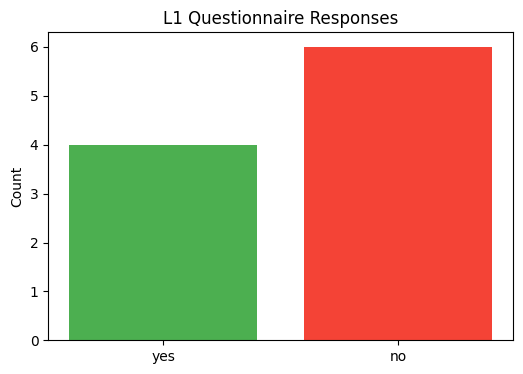

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


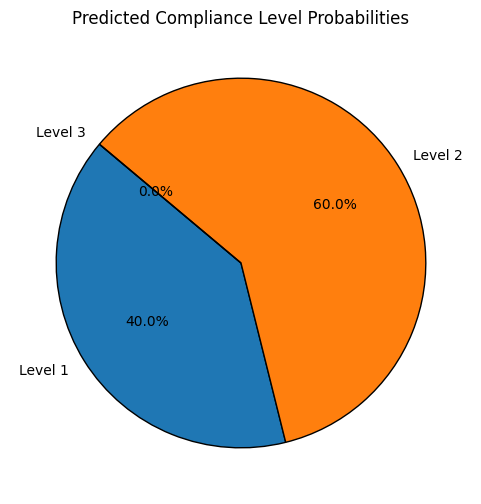


→ Final L1 Readiness Score: 40.0%
→ Predicted Compliance Level: Level 2

→ Improvement Plan (for any 'No' answers):
   • SI.L1-b.1.xii: Establish a patch management schedule; use automated tools to identify missing patches.
   • MP.L1-b.1.vii: Create and enforce a media disposal policy; use approved destruction methods.
   • PE.L1-b.1.viii: Implement badge/ID controls; keep audit logs of physical entry.
   • SC.L1-b.1.xi: Place public‐facing servers in a DMZ; strictly isolate from FCI‐handling networks.
   • SI.L1-b.1.xiii: Install and update anti‐malware software; schedule regular scans.
   • SI.L1-b.1.xv: Schedule periodic full‐disk and file‐based scans; review logs for detected malware.


In [ ]:
# ┌────────────────────────────────────────────────────────────────────────┐
# │                      6a. EXAMPLE WORKFLOW DEMO                         │
# └────────────────────────────────────────────────────────────────────────┘

# --- Step 1: Run the Level 1 Questionnaire ---
df_L1, score_L1, plan_L1 = run_questionnaire('L1')

# --- Step 2: Plot the “Yes/No” bar chart for L1 ---
plot_questionnaire_results(df_L1, level='L1')

# --- Step 3: (Optional) Display historical distribution, if you want context ---
# plot_historical_distribution(hist_df)

# --- Step 4: Predict compliance level using the trained classifier ---
readiness_score, missing_counts, pred_label, pred_probs = predict_compliance_level(df_L1)

# --- Step 5: Plot compliance‐level probability pie chart ---
plot_compliance_probabilities(pred_probs)

# --- Step 6: Display Results / Improvement Plan ---
print(f"\n→ Final {('L1')} Readiness Score: {readiness_score*100:.1f}%")
print(f"→ Predicted Compliance Level: {pred_label}")
print("\n→ Improvement Plan (for any 'No' answers):")
for advice in plan_L1:
    print(f"   • {advice}")
\